# Adams Moulton

The Adams Moulton method is an implicit multistep method. This notebook illustrates the 2 step Adams Moulton method for a linear initial value problem.
## Intial Value Problem

The general form of the population growth differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1.$$

## Python Libraries

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

### Defining the function
$$ f(t,y)=t-y.$$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a≤t≤b$  and number of steps  $N$ 
$$h=b−ah.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a.$

Here the interval is  $0≤t≤2$  and number of step  4 
$$h=\frac{2−0}{4}=0.5.$$
 
This gives the discrete time steps,
$$t_i=0+i0.5,$$
for  $i=0,1,⋯,4.$

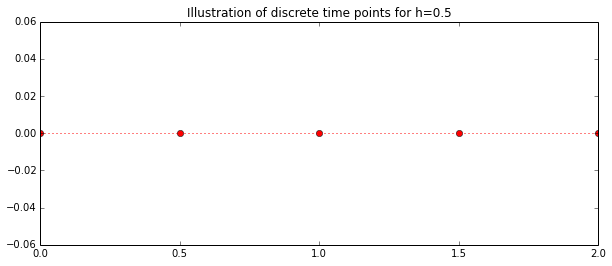

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N=4
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))

## Exact Solution
THe initial value problem has the exact solution
$$y(t)=2e^{-t}+t-1.$$
The figure below plots the exact solution.

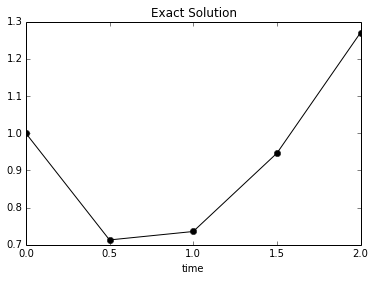

In [4]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')

In [5]:
# Initial Condition
w=np.zeros(N+1)
#np.zeros(N+1)
w[0]=IC

## 2-step Adams Moulton

The general 2-step Adams Moulton difference equation is
$$w_{i+1} = w_{i} + \frac{h}{12}(5f(t_{i+1},w_{i+1})+8f(t_{i},w_{i})-f(t_{i-1},w_{i-1})). $$
For the specific intial value problem the 2-step Adams Bashforth difference equation is
$$w_{i+1} = w_{i} + \frac{h}{12}(5(t_{i+1}-w_{i+1})+8(t_{i}-w_{i})-(t_{i-1}-w_{i-1})). $$

for $i=0$ the difference equation is:
$$w_{1} = w_{0} + \frac{h}{12}(5(t_{1}-w_{1})+8f(t_{0}-w_{0})-(t_{-1}-w_{-1})). $$

this is not solvable as <font color='red'> $w_{1}, \ w_{-1}$ </font> are unknown.
for $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{12}(5(t_{2}-w_{2})+8f(t_{1}-w_{1})-(t_{0}-w_{0})). $$
this is not solvable as <font color='red'> $w_{1}$ and $w_{2}$ </font> are unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$
As the intial value problem is linear the difference equation can be rearranged such that $w_2$ is on the right hand side:
$$w_{2}+\frac{5h}{12}w_{2} = w_{1} + \frac{h}{12}(5(t_{2})+8f(t_{1}-w_{1})-(t_{0}-w_{0})), $$
$$w_{2} = \frac{w_{1} + \frac{h}{12}(5(t_{2})+8f(t_{1}-w_{1})-(t_{0}-w_{0}))}{1+\frac{5h}{12}}. $$


In [6]:
### Initial conditions
w=np.zeros(len(t))
w[0]=IC
w[1]=y[1]

### Loop

In [7]:
for k in range (1,N):
    w[k+1]=(w[k]+h/12.0*(5*t[k+1]+8*myfun_ty(t[k],w[k])-myfun_ty(t[k-1],w[k-1])))/(1+5*h/12)   

### Plotting solution

In [8]:
def plotting(t,w,y):
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w,'s:',color='blue',label='Adams-Moulton')
    plt.xlabel('time')
    plt.legend()
    plt.show 

The plot below shows the exact solution (black) and the 2 step Adams-Moulton approximation (red) of the intial value problem

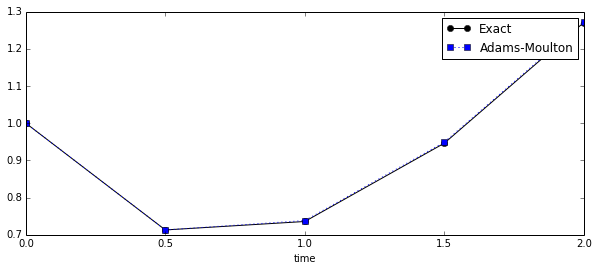

In [9]:
plotting(t,w,y)

## Local Error 
The Error for the 2 step Adams Moulton is:
$$y_{n+1}=y_n+\frac{h}{12}[5f(t_{n+1},w_{n+1})+8f(t_{n},w_{n})-f(t_{n-1},w_{n-1})] +\frac{-h^4}{24}y^{(4)}(\eta),$$
where $\eta \in [t_{n-1},t_{n+1}]$.

Rearranging the equations gives 
$$\frac{y_{n+1}-y_{n}}{h}=\frac{1}{12}[5f(t_{n+1},w_{n+1})+8f(t_{n},w_{n})-f(t_{n-1},w_{n-1})] +\frac{-h^3}{24}y^{(4)}(\eta),$$
For our specific initial value problem the error is of the form:
$$\frac{-h^4}{24}y'''(\eta)=\frac{h^4}{24}2e^{-\eta} \leq\frac{(0.5)^4}{24} 2\leq 0.00521 $$

In [10]:
table = ListTable()
table.append(['time', 'Adams Bashforth','Exact','Error','LTE'])
for i in range (0,len(t)):
    table.append([round(t[i],3), round(w[i],3), round(y[i],3),round(abs(y[i]-w[i]),5),round(2*0.5**4/24,5)])
table

time,Adams Bashforth,Exact,Error,LTE
0.0,1.0,1.0,0.0,0.00521
0.5,0.713,0.713,0.0,0.00521
1.0,0.738,0.736,0.00248,0.00521
1.5,0.949,0.946,0.00287,0.00521
2.0,1.273,1.271,0.00258,0.00521
